In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
df= pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [21]:
#checking column data typs and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [22]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

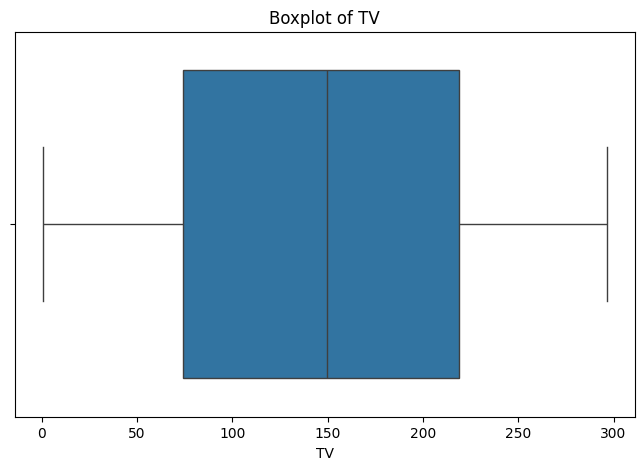

In [23]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TV'])
plt.title("Boxplot of TV")
plt.show()

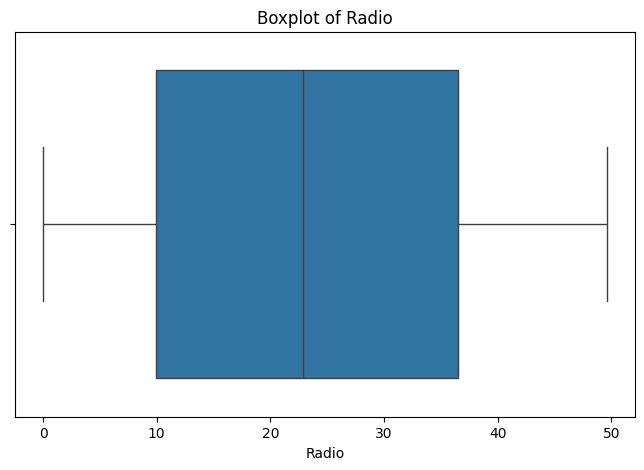

In [24]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Radio'])
plt.title("Boxplot of Radio")
plt.show()

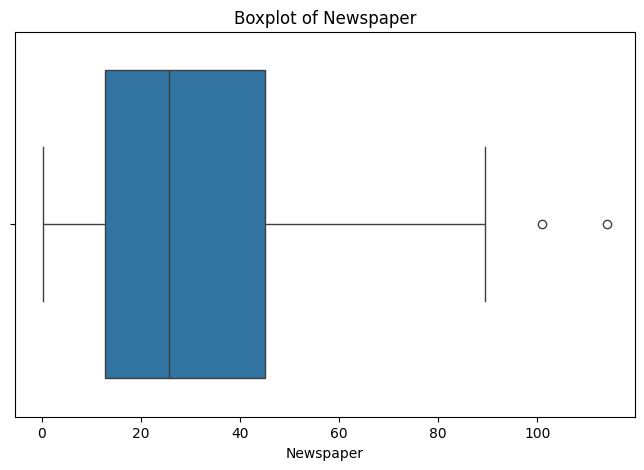

In [25]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Newspaper'])
plt.title("Boxplot of Newspaper")
plt.show()

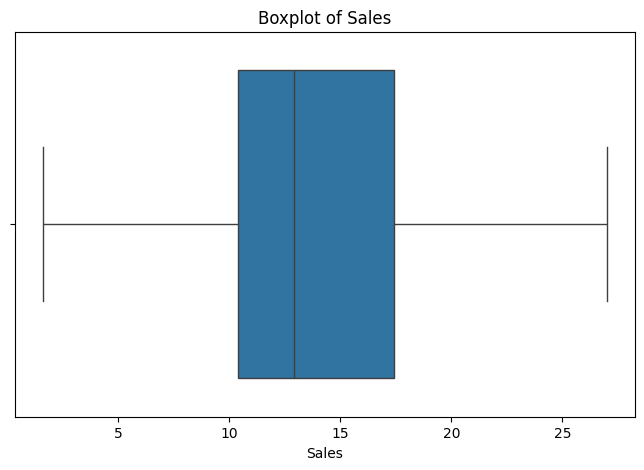

In [26]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sales'])
plt.title("Boxplot of Sales")
plt.show()

In [27]:
#checking for unnecessary columns
print(df.columns)


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [28]:
#droping the unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [29]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [30]:
#setting x and y for model testing and training
x = df.drop("Sales", axis =1)
y = df["Sales"]

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


In [33]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.4607567168117603
Mean Squared Error (MSE): 3.1740973539761033
R² Score: 0.899438024100912
